In [151]:
# step-1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
visa_df=pd.read_csv(r"E:\Data Science Course\Data files\Visadataset.csv")
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [452]:
cat_col=visa_df.select_dtypes(include='object')
cat_col.shape # 9 cols

(25480, 9)

In [157]:
cat_col=visa_df.select_dtypes(include='object').columns
num_col=visa_df.select_dtypes(exclude='object').columns
cat_col,num_col

(Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
        'requires_job_training', 'region_of_employment', 'unit_of_wage',
        'full_time_position', 'case_status'],
       dtype='object'),
 Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object'))

In [24]:
visa_df['continent']

0          Asia
1          Asia
2          Asia
3          Asia
4        Africa
          ...  
25475      Asia
25476      Asia
25477      Asia
25478      Asia
25479      Asia
Name: continent, Length: 25480, dtype: object

In [30]:
visa_df['continent'].unique() # displays the unique elements in the column

array(['Asia', 'Africa', 'North America', 'Europe', 'South America',
       'Oceania'], dtype=object)

In [32]:
len(visa_df['continent'].unique()) # There are total 6 unique countries in continent column

6

In [36]:
visa_df['continent'].nunique() # displays total count of unique columns in the column

6

**frequency tables**

- continent column has some unique continent names are available

- total data size is 25480 obs

- will create a table having continents and number of applicants from each continent

In [85]:
# step-1: total data
visa_df

# step-2: select particular column
visa_df['continent']

# step-3: equating to speccific lable
con=visa_df['continent']=='Asia'

# step-4: pass the condition to entire DataFrame
len(visa_df[con])

16861

In [101]:
# con=visa_df['continent']=='Asia'
# len(visa_df[con])
# con=visa_df['continent']=='Asia'
# con=visa_df['continent']=='Africa'
# con=visa_df['continent']=='Europe'
# con=visa_df['continent']=='North America'
# con=visa_df['continent']=='South America'
# con=visa_df['continent']=='Ocenia'
# con=visa_df['continent']==i
# len(visa_df[con])

0

In [105]:
no_of_applicants=[]
labels=visa_df['continent'].unique()
for i in labels:
    con=visa_df['continent']==i
    count=len(visa_df[con])
    no_of_applicants.append(count)

In [111]:
# no_of_applicants for every country
for i,j in zip(labels,no_of_applicants):
    print(i,':',j)

Asia : 16861
Africa : 551
North America : 3292
Europe : 3732
South America : 852
Oceania : 192


In [113]:
# converting to DF
continent_df=pd.DataFrame(zip(labels,no_of_applicants),
                         columns=['Continent','No of applicants'])
continent_df

,Continent,No of applicants
0,Asia,16861
1,Africa,551
2,North America,3292
3,Europe,3732
4,South America,852
5,Oceania,192


In [127]:
# we need to do it to every categorical column
for i in cat_col:
    print(i)

case_id
continent
education_of_employee
has_job_experience
requires_job_training
region_of_employment
unit_of_wage
full_time_position
case_status


In [176]:
count=[]
for col in cat_col[1:]:
    labels=visa_df[col].unique()
    for label in labels:
        con=visa_df[col]==label
        count.append(len(visa_df[con]))
    df=pd.DataFrame(zip(col,count),columns=['Column','Count'])
    df.to_csv(f'{col}_df.csv',index=False)

**value counts**

In [179]:
continent_vc=visa_df['continent'].value_counts()
continent_vc

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [185]:
keys=continent_vc.keys()

In [187]:
values=continent_vc.values

In [191]:
continent_df=pd.DataFrame(zip(keys,values),columns=['Continent','Number of Applicants'])
continent_df

,Continent,Number of Applicants
0,Asia,16861
1,Europe,3732
2,North America,3292
3,South America,852
4,Africa,551
5,Oceania,192


In [ ]:
continent_vc=visa_df['continent'].value_counts()
keys=continent_vc.keys()
values=continent_vc.values
continent_df=pd.DataFrame(zip(keys,values),
                          columns=['Continent','Number of Applicants'])
continent_df.to_csv('continent_dff.csv',index=False)

In [193]:
for i in cat_col[1:]:
    vc=visa_df[i].value_counts()
    keys=vc.keys()
    values=vc.values
    vc_df=pd.DataFrame(zip(keys,values),columns=['Labels','Count'])
    vc_df.to_csv(f'{i}_vc_df.csv',index=False)

In [195]:
directory=r'C:\Users\akepo\Documents\Naresh IT\Data analysis\EDA\EDA re practice from basics'
for i in cat_col[1:]:
    print(f'{directory}\\{i}_df.csv')

C:\Users\akepo\Documents\Naresh IT\Data analysis\EDA\EDA re practice from basics\continent_df.csv
C:\Users\akepo\Documents\Naresh IT\Data analysis\EDA\EDA re practice from basics\education_of_employee_df.csv
C:\Users\akepo\Documents\Naresh IT\Data analysis\EDA\EDA re practice from basics\has_job_experience_df.csv
C:\Users\akepo\Documents\Naresh IT\Data analysis\EDA\EDA re practice from basics\requires_job_training_df.csv
C:\Users\akepo\Documents\Naresh IT\Data analysis\EDA\EDA re practice from basics\region_of_employment_df.csv
C:\Users\akepo\Documents\Naresh IT\Data analysis\EDA\EDA re practice from basics\unit_of_wage_df.csv
C:\Users\akepo\Documents\Naresh IT\Data analysis\EDA\EDA re practice from basics\full_time_position_df.csv
C:\Users\akepo\Documents\Naresh IT\Data analysis\EDA\EDA re practice from basics\case_status_df.csv


In [ ]:
# i='continent'

- step-1: i created a folder i.e. freq_table

- step-2: i get the directory path
  - new_directory=python_location + folder_name

- step-3: i get the full path
  - new_directory+colname.csv


**Step-1: Create a folder**

In [199]:
import os
folder_name='freq_tables'
try:
    os.makedirs(folder_name)
except Exception as e:
    print(e)

**Step-2:New Directory**

In [202]:
cwd=os.getcwd()
new_dir=os.path.join(cwd,folder_name)
new_dir

'C:\\Users\\akepo\\Documents\\Naresh IT\\Data analysis\\EDA\\EDA re practice from basics\\freq_tables'

**Full Paths**

In [205]:
for i in cat_col[1:]:
    file_name=f'{i}_df.csv'
    path=os.path.join(new_dir,file_name)
    print(path)

C:\Users\akepo\Documents\Naresh IT\Data analysis\EDA\EDA re practice from basics\freq_tables\continent_df.csv
C:\Users\akepo\Documents\Naresh IT\Data analysis\EDA\EDA re practice from basics\freq_tables\education_of_employee_df.csv
C:\Users\akepo\Documents\Naresh IT\Data analysis\EDA\EDA re practice from basics\freq_tables\has_job_experience_df.csv
C:\Users\akepo\Documents\Naresh IT\Data analysis\EDA\EDA re practice from basics\freq_tables\requires_job_training_df.csv
C:\Users\akepo\Documents\Naresh IT\Data analysis\EDA\EDA re practice from basics\freq_tables\region_of_employment_df.csv
C:\Users\akepo\Documents\Naresh IT\Data analysis\EDA\EDA re practice from basics\freq_tables\unit_of_wage_df.csv
C:\Users\akepo\Documents\Naresh IT\Data analysis\EDA\EDA re practice from basics\freq_tables\full_time_position_df.csv
C:\Users\akepo\Documents\Naresh IT\Data analysis\EDA\EDA re practice from basics\freq_tables\case_status_df.csv


In [209]:
for i in cat_col[1:]:
    vc=visa_df[i].value_counts()
    keys=vc.keys()
    values=vc.values
    vc_df=pd.DataFrame(zip(keys,values),
                      columns=['Label','Count'])
    file_name=f'{i}_df.csv'
    path=os.path.join(new_dir,file_name)
    vc.to_csv(path,index=False)

**groupby**

- in SQL we have a groupby function is there

- Similarly in Python also we have group by

- First it will group the similiar lables together

- on that we can perform any math operations


In [213]:
visa_df.groupby('continent')

In [215]:
list(visa_df.groupby('continent'))

[('Africa',
           case_id continent education_of_employee has_job_experience  \
  4         EZYV05    Africa              Master's                  Y   
  18        EZYV19    Africa              Master's                  Y   
  74        EZYV75    Africa              Master's                  Y   
  194      EZYV195    Africa              Master's                  Y   
  242      EZYV243    Africa            Bachelor's                  N   
  ...          ...       ...                   ...                ...   
  25385  EZYV25386    Africa             Doctorate                  Y   
  25408  EZYV25409    Africa              Master's                  Y   
  25443  EZYV25444    Africa            Bachelor's                  N   
  25446  EZYV25447    Africa              Master's                  N   
  25474  EZYV25475    Africa             Doctorate                  N   
  
        requires_job_training  no_of_employees  yr_of_estab  \
  4                         N             1082

In [225]:
visa_df.groupby('continent').size() # it will give count of similar labels by ascending order

continent
Africa             551
Asia             16861
Europe            3732
North America     3292
Oceania            192
South America      852
dtype: int64

In [223]:
visa_df['continent'].value_counts() # it comes by count descending order

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

**Barcharts**

- bar charts under the matplotlib

- plt.bar

- bar chart needs class names and class frequency

- class names we can get from value counts

- class frequency we can get from value counts


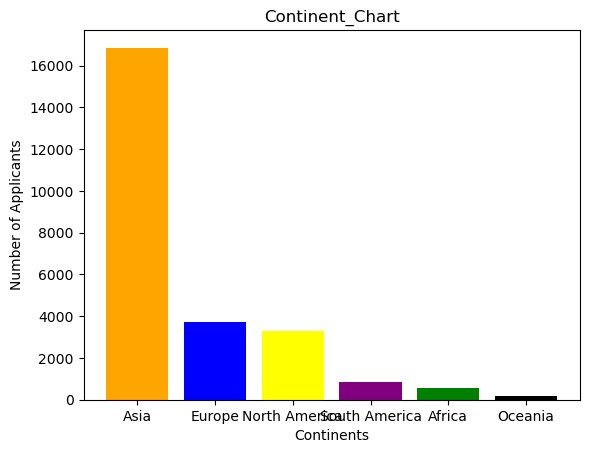

In [242]:
class_names=visa_df['continent'].value_counts().keys()
class_freq=visa_df['continent'].value_counts().values
colors=['Orange','Blue','Yellow','Purple','Green','Black']
plt.bar(class_names,class_freq,color=colors)
plt.xlabel('Continents')
plt.ylabel('Number of Applicants')
plt.title('Continent_Chart')
plt.show()

In [245]:
visa_df.keys()

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

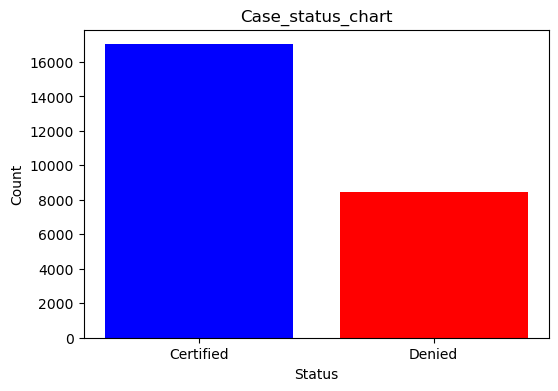

In [289]:
class_names=visa_df['case_status'].value_counts().keys()
class_freq=visa_df['case_status'].value_counts().values
colors=['BLue','Red']
plt.figure(figsize=(6,4)) # widthxheight
plt.bar(class_names,class_freq,color=colors)
plt.title('Case_status_chart')
plt.xlabel('Status')
plt.ylabel('Count')

plt.show()


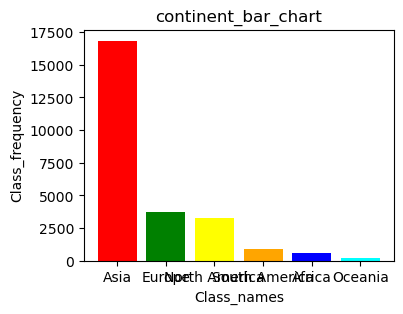

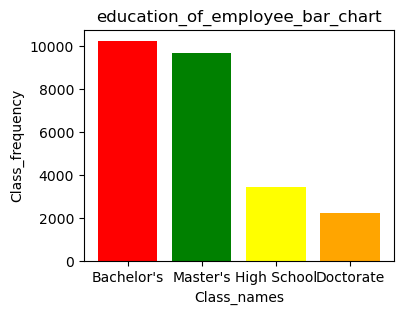

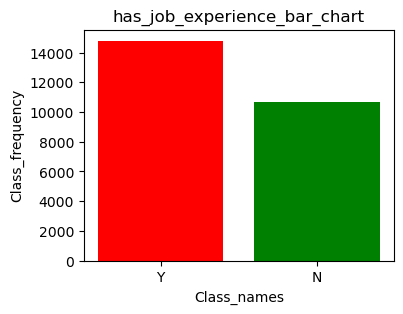

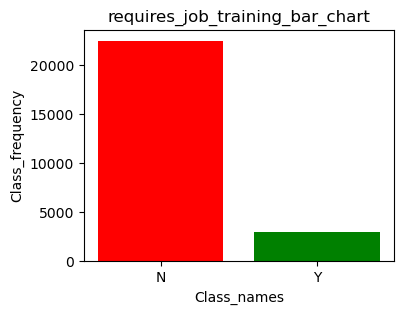

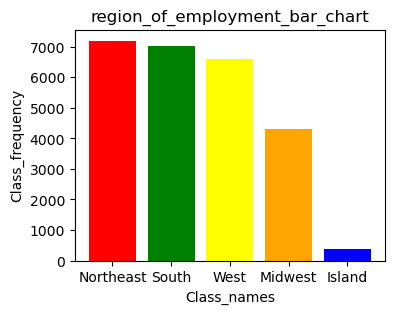

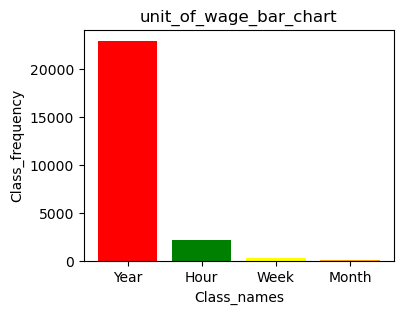

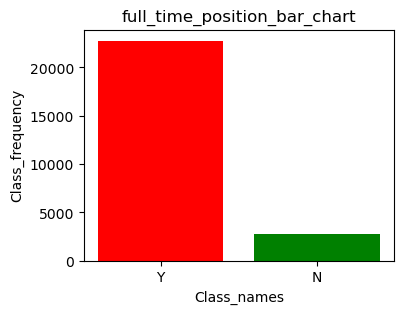

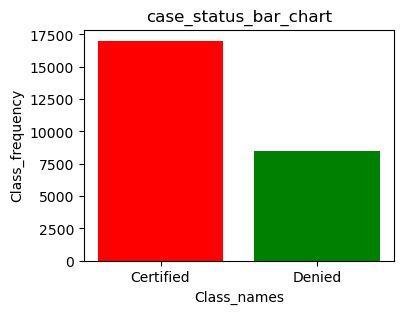

In [295]:
colors=['Red','Green','Yellow','Orange','Blue','Cyan']
for i in cat_col[1:]:
    class_names=visa_df[i].value_counts().keys()
    class_freq=visa_df[i].value_counts().values
    plt.figure(figsize=(4,3))
    plt.bar(class_names,class_freq,color=colors)
    plt.xlabel('Class_names')
    plt.ylabel('Class_frequency')
    title=f'{i}_bar_chart'
    plt.title(title)
    plt.show()

**Drawback**: We have to scroll to see each plot

**SubPlots**

<Axes: >

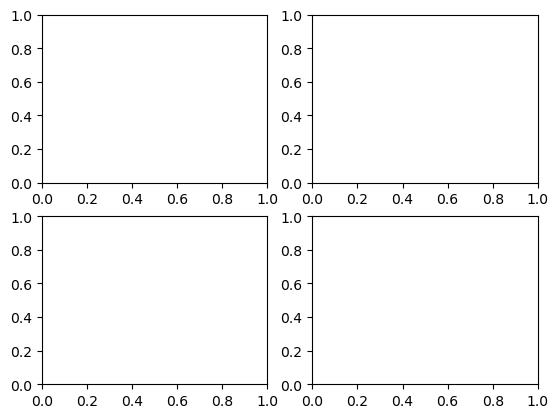

In [310]:
plt.subplot(2,2,1)
plt.subplot(2,2,2)
plt.subplot(2,2,3)
plt.subplot(2,2,4)

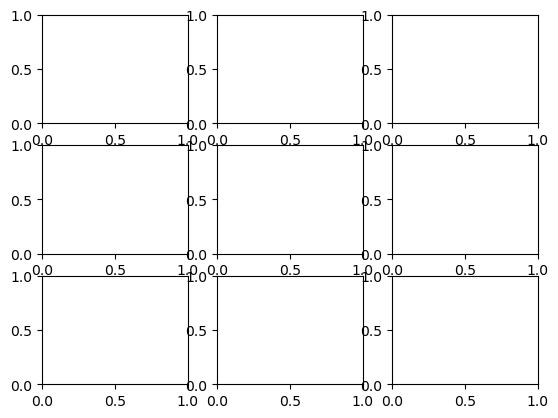

In [316]:
for i in range(1,10):
    plt.subplot(3,3,i)

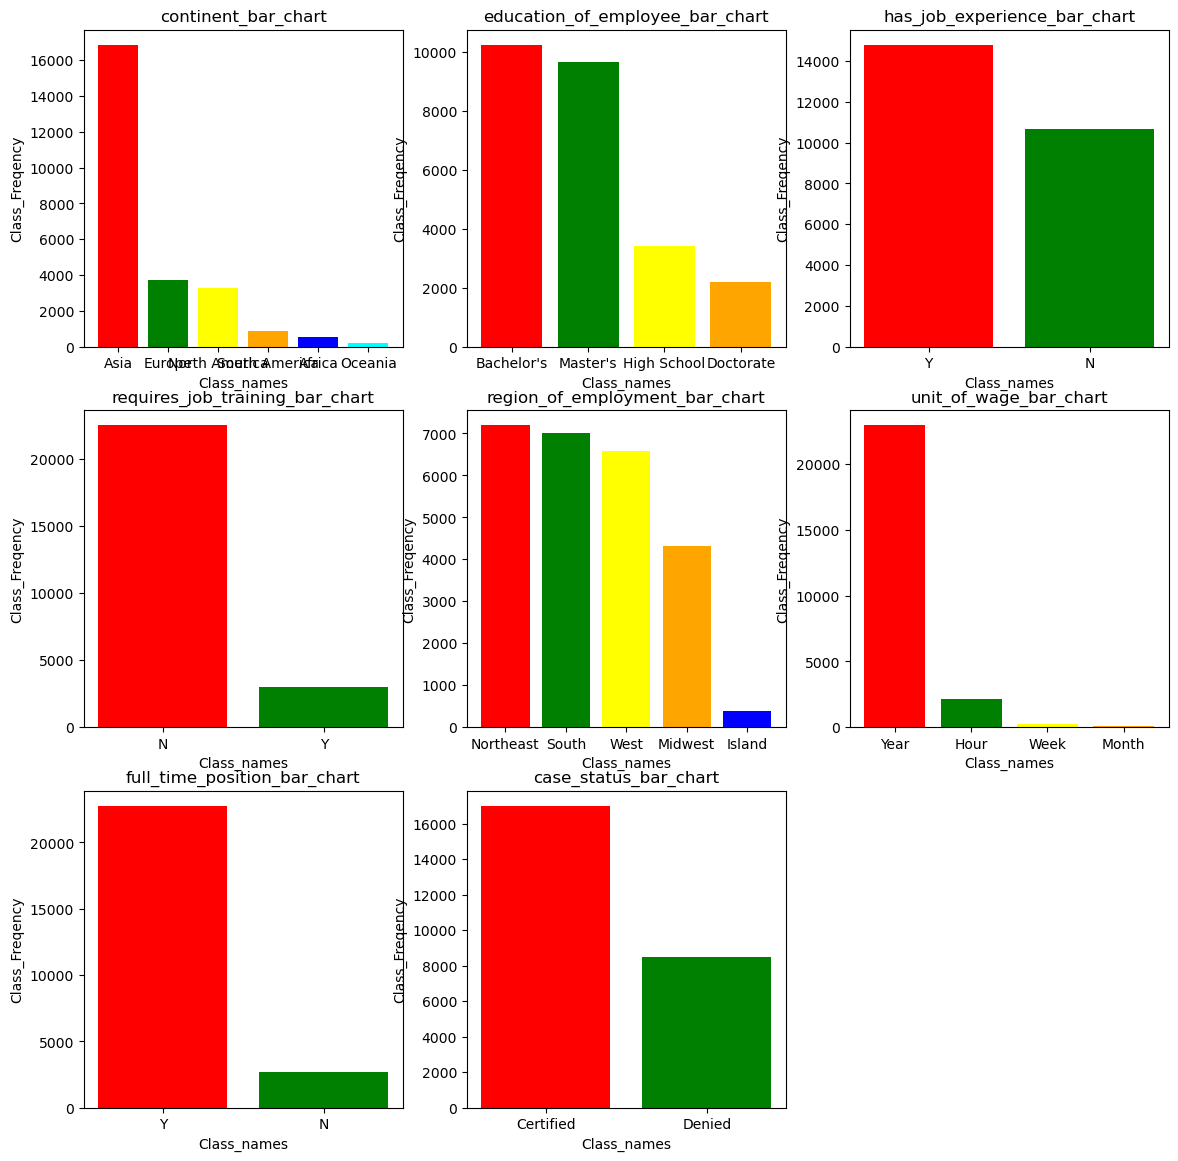

In [351]:
colors=['Red','Green','Yellow','Orange','Blue','Cyan']
plt.figure(figsize=(14,14))
for i in range(1,len(cat_col)):
    class_names=visa_df[cat_col[i]].value_counts().keys()
    class_freq=visa_df[cat_col[i]].value_counts().values
    plt.subplot(3,3,i)
    plt.bar(class_names,
            class_freq,
            color=colors)
    plt.xlabel('Class_names')
    plt.ylabel('Class_Freqency')
    plt.title(f'{cat_col[i]}_bar_chart')
    

    

In [353]:
str1='python'
for i in range(len(str1)):
 print(i,str1[i])

0 p
1 y
2 t
3 h
4 o
5 n


In [359]:
visa_df['continent'].value_counts(normalize=True)*100 # it will show the percentage of each label

continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64

In [361]:
per=visa_df['continent'].value_counts(normalize=True)*100 
p_k=per.keys()
p_v=per.values
pd.DataFrame(zip(p_k,p_v))

,0,1
0,Asia,66.173469
1,Europe,14.646782
2,North America,12.919937
3,South America,3.343799
4,Africa,2.162480
5,Oceania,0.753532


In [383]:
# Own Trail
# creating a folder
import os
folder='Percentage_DF\'s'
try:
    os.makedirs(folder)
except Exception as e:
    print(e)

[WinError 183] Cannot create a file when that file already exists: "Percentage_DF's"


In [389]:
# New Directory
cwd=os.getcwd()
nwd=os.path.join(cwd,folder)
nwd

"C:\\Users\\akepo\\Documents\\Naresh IT\\Data analysis\\EDA\\EDA re practice from basics\\Percentage_DF's"

In [403]:
# Full path
for i in cat_col[1:]:
    per_vc=visa_df[i].value_counts(normalize=True)*100
    keys=per_vc.keys()
    values=per_vc.values
    per_df=pd.DataFrame(zip(keys,values),
                        columns=['Label','Percentage'])
    filename=f'{i}_percentage_df.csv'
    nwd=os.path.join(cwd,folder)
    path=os.path.join(nwd,filename)
    per_df.to_csv(path,index=False)

**PieChart**

([<matplotlib.patches.Wedge at 0x19eb1702c00>,
 [Text(-0.5351743362316361, 0.9610350825224997, 'Asia'),
  Text(-0.10373513115748138, -1.0950977228374372, 'Europe'),
  Text(0.7670026411947619, -0.7884839557024984, 'North America'),
  Text(1.0546117976794491, -0.3127202522947962, 'South America'),
  Text(1.0926986108246142, -0.12652962460213996, 'Africa'),
  Text(1.0996917916121562, -0.026037731484255974, 'Oceania')])

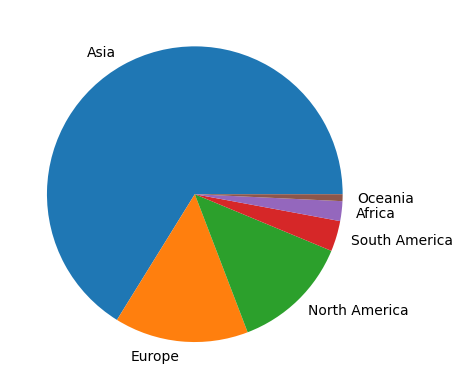

In [410]:
keys=visa_df['continent'].value_counts().keys()
values=visa_df['continent'].value_counts().values
plt.pie(values,
       labels=keys)

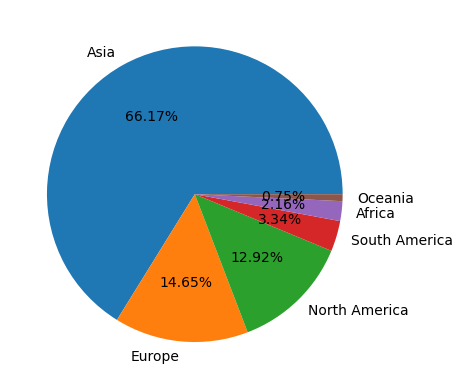

In [424]:
# to get percentage we use autopct
keys=visa_df['continent'].value_counts().keys()
values=visa_df['continent'].value_counts().values
plt.pie(values,
       labels=keys,
       autopct='%0.2f%%') # "#<value>%" --> "%0.2%" takes 2 values after decimal
plt.show()

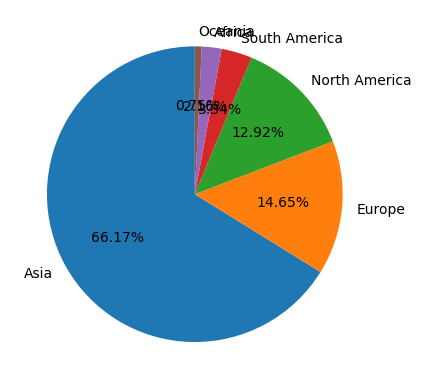

In [426]:
plt.pie(values,
        labels=keys,
       autopct="%0.2f%%", # "%<value>%" %0.2%% taking 2 values after decimal  
       startangle=90,)  # it will adjust the angle of chart
plt.show()

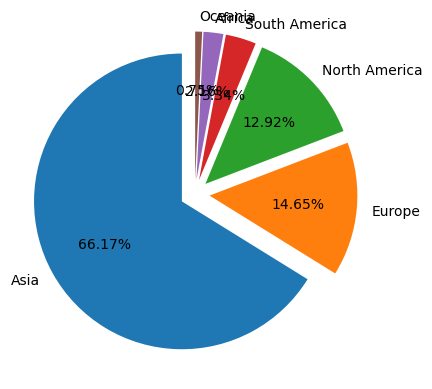

In [438]:
plt.pie(values,
        labels=keys,
       autopct="%0.2f%%", # "%<value>%" %0.2%% taking 2 values after decimal  
       startangle=90,
       explode=[0.1,0.1,0.1,0.1,0.1,0.1])  # exact values should be provide
plt.show()

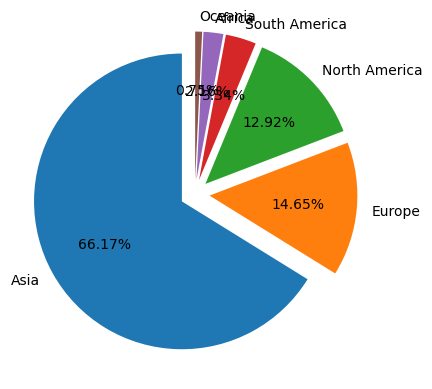

In [440]:
plt.pie(values,
        labels=keys,
       autopct="%0.2f%%", # "%<value>%" %0.2%% taking 2 values after decimal  
       startangle=90,
       explode=[0.1 for i in range(6)])  # exact values should be provide
plt.show()

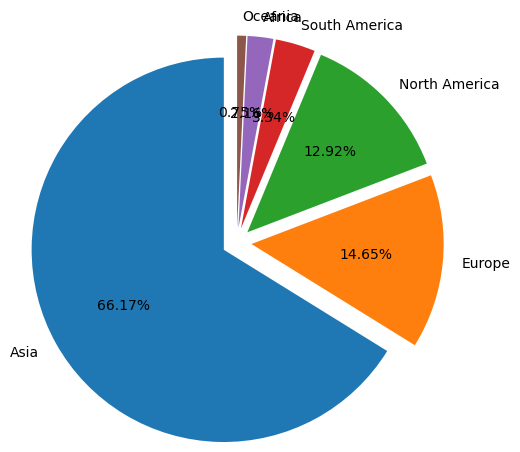

In [442]:
plt.pie(values,
        labels=keys,
       autopct="%0.2f%%", # "%<value>%" %0.2%% taking 2 values after decimal  
       startangle=90,
       explode=[0.1 for i in range(6)], # exact values should be provide
       radius=1.3)  # increases the pie chart size
plt.show()